# Imports, classes and methods declaration

In [ ]:
from google.colab import drive
import sys
import os
import numpy as np

# Local python files imports
drive.flush_and_unmount()
drive.mount("/content/gdrive", force_remount=True)
sys.path.append(os.path.abspath(
    '/content/gdrive/MyDrive/ULPGC/TFT/projects/COVID-detector'))

from covid_detector.dataset import Dataset
from covid_detector.models.tomography.tomography_model import (
    TomographyModel
)
from covid_detector.models.tomography.tomography_constants import(
    AUGMENTED_DATASET_2,
    TRAIN_IMAGES_FILE_PATH,
    TRAIN_LABELS_FILE_PATH,
    TEST_IMAGES_FILE_PATH,
    TEST_LABELS_FILE_PATH,
    PADDING
)
from covid_detector.models.utils.plotters import (
    plot_results,
    get_falses,
    plot_images
)
from covid_detector.models.utils.data_management import (
    dataset_images_to_files,
    load_data
)

Mounted at /content/gdrive


# Dataset and train

In [ ]:
dataset = Dataset(AUGMENTED_DATASET_2)

INFO [10/23/21 17:58:46] => Getting images from CT_COVID
INFO [10/23/21 17:58:46] => Getting images from CT_NonCOVID
INFO [10/23/21 17:58:54] => Splitting dataset into training and test
INFO [10/23/21 17:58:54] => The dataset has been generated successfully


In [ ]:
dataset_images_to_files(
    dataset,
    TRAIN_IMAGES_FILE_PATH,
    TRAIN_LABELS_FILE_PATH,
    TEST_IMAGES_FILE_PATH,
    TEST_LABELS_FILE_PATH
)

*************************************************
INFO [10/23/21 17:20:53] => Inserting data into the file: /content/gdrive/MyDrive/ULPGC/TFT/data/data_variable_files/dataset_2/train_images
INFO [10/23/21 17:21:02] => The data has been inserted successfully
*************************************************
INFO [10/23/21 17:21:02] => Inserting data into the file: /content/gdrive/MyDrive/ULPGC/TFT/data/data_variable_files/dataset_2/train_labels
INFO [10/23/21 17:21:02] => The data has been inserted successfully
*************************************************
INFO [10/23/21 17:21:02] => Inserting data into the file: /content/gdrive/MyDrive/ULPGC/TFT/data/data_variable_files/dataset_2/test_images
INFO [10/23/21 17:21:13] => The data has been inserted successfully
*************************************************
INFO [10/23/21 17:21:13] => Inserting data into the file: /content/gdrive/MyDrive/ULPGC/TFT/data/data_variable_files/dataset_2/test_labels
INFO [10/23/21 17:21:13] => The data h

In [ ]:
# Cell in case the dataset files have been created

dataset = Dataset(AUGMENTED_DATASET_2, file_load_mode=True)
load_data(
    dataset,
    TRAIN_IMAGES_FILE_PATH,
    TRAIN_LABELS_FILE_PATH,
    TEST_IMAGES_FILE_PATH,
    TEST_LABELS_FILE_PATH
)

INFO [10/18/21 18:19:39] => Retrieving all the dataset from files
INFO [10/18/21 18:19:58] => All the dataset has been obtained successfully


In [ ]:
tomography_model = TomographyModel(dataset)

*************************************************
INFO [10/23/21 17:59:06] => Training model
Epoch 1/60
27/27 [==============================] - 5s 155ms/step - loss: 0.7491 - accuracy: 0.5344 - val_loss: 0.6793 - val_accuracy: 0.5672
Epoch 2/60
27/27 [==============================] - 4s 146ms/step - loss: 0.6387 - accuracy: 0.6265 - val_loss: 0.6956 - val_accuracy: 0.6090
Epoch 3/60
27/27 [==============================] - 4s 146ms/step - loss: 0.5559 - accuracy: 0.6939 - val_loss: 0.5513 - val_accuracy: 0.7075
Epoch 4/60
27/27 [==============================] - 4s 145ms/step - loss: 0.4703 - accuracy: 0.7740 - val_loss: 0.5447 - val_accuracy: 0.7373
Epoch 5/60
27/27 [==============================] - 4s 145ms/step - loss: 0.4093 - accuracy: 0.8159 - val_loss: 0.4829 - val_accuracy: 0.8000
Epoch 6/60
27/27 [==============================] - 4s 147ms/step - loss: 0.3563 - accuracy: 0.8428 - val_loss: 0.5413 - val_accuracy: 0.7552
Epoch 7/60
27/27 [==============================] - 4s 

# Train results

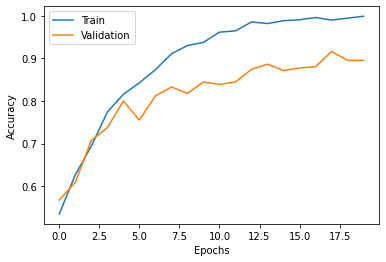

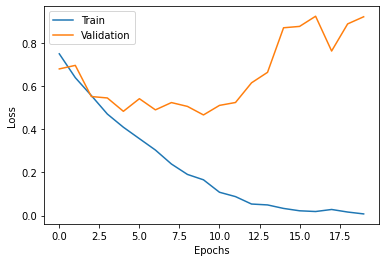

No handles with labels found to put in legend.


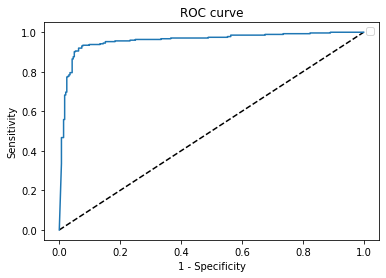

INFO [10/23/21 18:00:31] => Classification report:
              precision    recall  f1-score   support

   Not COVID       0.94      0.89      0.91       284
       COVID       0.89      0.94      0.91       274

    accuracy                           0.91       558
   macro avg       0.91      0.91      0.91       558
weighted avg       0.92      0.91      0.91       558

valid


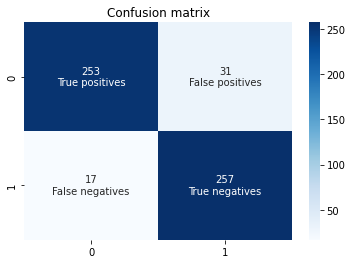

In [ ]:
plot_results(dataset.test_images, dataset.test_labels, tomography_model.results)

# Visualize falses

In [ ]:
false_negatives, false_positives = get_falses(
    dataset.test_images,
    dataset.test_labels, 
    np.round(tomography_model.results['Model test predictions']))

INFO [10/23/21 17:09:03] => Getting false negatives and positives...
INFO [10/23/21 17:09:03] => Falses report:
- False negatives: 28
- False positives: 19


In [ ]:
plot_images(false_negatives, 'false negatives')

Output hidden; open in https://colab.research.google.com to view.

INFO [10/23/21 17:09:11] => Plotting false positives


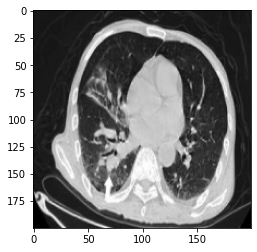

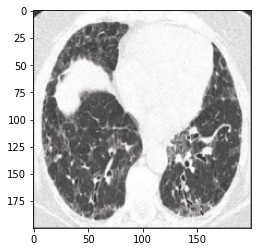

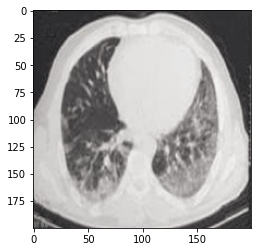

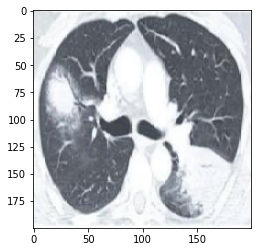

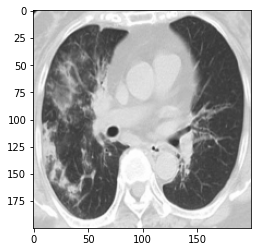

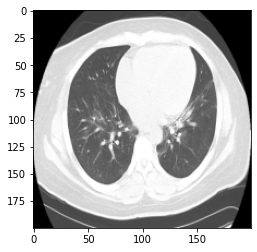

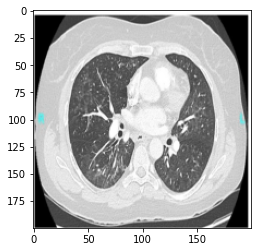

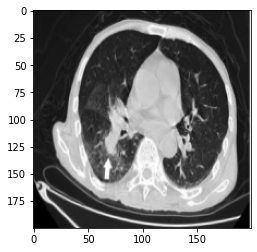

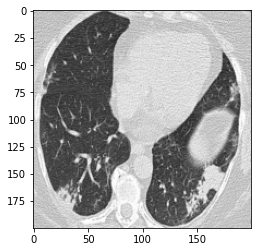

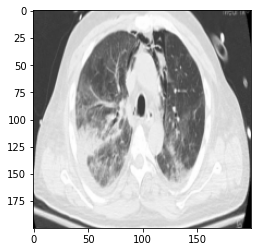

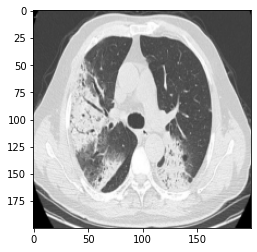

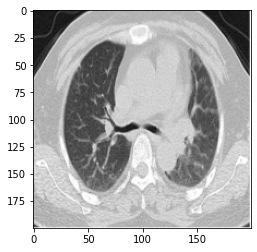

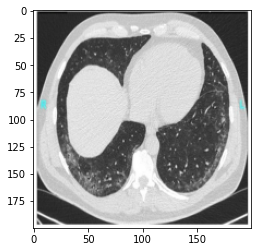

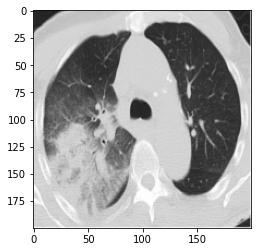

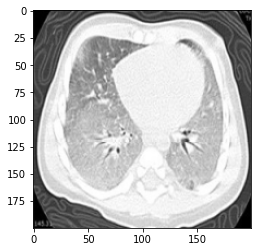

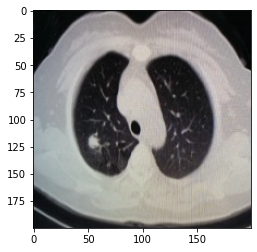

In [ ]:
plot_images(false_positives, 'false positives')